## Problem 1 (LASSO and Ridge regression)
### (a)

In [55]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge

In [60]:
data = scipy.io.loadmat('05HW1_diabetes.mat')
train_x = data['x_train']
train_y = data['y_train']
test_x = data['x_test']
test_y = data['y_test']
Lambda = (0.01, 0.1, 1, 10, 100, 1000)
Lambda_log = np.log10(Lambda)

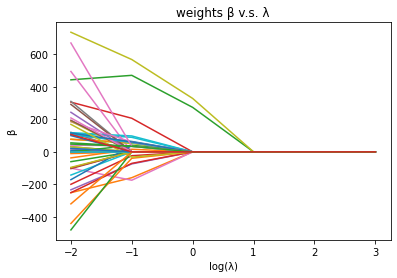

In [61]:
weight = []
test_loss = []
for l in Lambda:
    model = Lasso(alpha=l)
    model.fit(train_x, train_y)
    weight.append(model.coef_)
    test_equ = test_x.dot(model.coef_) + model.intercept_
    test_loss.append(sum(np.transpose(np.array([test_equ]) - test_y)**2))


plt.figure()
plt.plot(Lambda_log, weight)
plt.title('weights β v.s. λ')
plt.xlabel('log(λ)')
plt.ylabel('β')
plt.show()


## Problem 2 (LASSO regression)
### (a)

In [58]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge

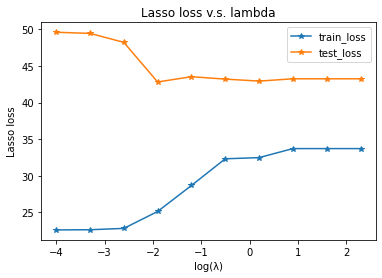

In [59]:
Lambda = (0.0001, 0.0005, 0.0025, 0.0125, 0.0625, 0.3125, 1.5625, 7.815, 39.0625, 195.3125)
Lambda_log = np.log10(Lambda)

train = np.loadtxt('05HW2_wine_training.txt')
train_x = train[:,:-1]
train_y = train[:,-1]
test = np.loadtxt('05HW2_wine_test.txt')
test_x = test[:,:-1]
test_y = test[:,-1]

test_loss = []
train_loss = []

for l in (Lambda):
    model = Lasso(alpha=l)
    model.fit(train_x, train_y)
    train_equ = train_x.dot(model.coef_) + model.intercept_
    train_loss.append(sum(np.transpose(np.array([train_equ]) - train_y)**2))
    test_equ = test_x.dot(model.coef_) + model.intercept_
    test_loss.append(sum(np.transpose(np.array([test_equ]) - test_y)**2))

plt.figure()
plt.plot(Lambda_log, train_loss, '*-', label="train_loss")
plt.plot(Lambda_log, test_loss, '*-', label="test_loss")
plt.legend()
plt.xlabel('log(λ)')
plt.ylabel('Lasso loss')
plt.title('Lasso loss v.s. lambda')
plt.show()


### (b)
1. 𝜆 < 0.025, test loss很高，然而train loss卻在很低的值，應有發生overfitting現象
2. 𝜆 = 0.025, test loss最低，並且train loss也並無太高，應為最佳參數
3. 𝜆 > 0.025, 兩者皆迅速攀升，應是被𝜆限制model表現，因此發生underfitting

### (c)
我會選擇𝜆 = 0.025，原因與上小題2.相同，此時的test error表現最小